# Football Player Position Classification

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d adilshamim8/football-player-position

Dataset URL: https://www.kaggle.com/datasets/adilshamim8/football-player-position
License(s): Attribution 4.0 International (CC BY 4.0)
100%|███████████████████████████████████████| 98.4k/98.4k [00:00<00:00, 140kB/s]
100%|███████████████████████████████████████| 98.4k/98.4k [00:00<00:00, 140kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Football Player Position Classification/football-player-position.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Football Player Position Classification')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("football-player-position.csv")

In [5]:
df.head()

,Age,Height,Matches,Minutes/Match,Goals/Match,Assists/Match,Yellow Cards/Match,Red Cards/Match,Shots/Match,Pass Success Rate,Aerials Won,class
0,25.0,192.0,224.0,86.986607,0.049107,0.062500,0.187500,0.008929,0.5,85.3,2.2,Defender
1,27.0,189.0,67.0,69.343284,0.552239,0.134328,0.059701,0.000000,2.0,73.6,1.1,Forward
2,21.0,182.0,68.0,62.735294,0.191176,0.044118,0.073529,0.000000,1.7,83.8,0.3,Midfielder
3,25.0,189.0,58.0,89.017241,0.000000,0.000000,0.086207,0.000000,0.0,74.3,0.3,Goalkeeper
4,25.0,180.0,173.0,55.774566,0.075145,0.080925,0.144509,0.017341,0.9,82.4,0.3,Midfielder


In [6]:
df.shape

(3611, 12)

In [7]:
df.size

43332

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3611 entries, 0 to 3610
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 3611 non-null   float64
 1   Height              3611 non-null   float64
 2   Matches             3611 non-null   float64
 3   Minutes/Match       3611 non-null   float64
 4   Goals/Match         3611 non-null   float64
 5   Assists/Match       3611 non-null   float64
 6   Yellow Cards/Match  3611 non-null   float64
 7   Red Cards/Match     3611 non-null   float64
 8   Shots/Match         3611 non-null   float64
 9   Pass Success Rate   3611 non-null   float64
 10  Aerials Won         3611 non-null   float64
 11  class               3611 non-null   object 
dtypes: float64(11), object(1)
memory usage: 338.7+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3611.0,25.177236,4.318631,16.0,22.000000,25.000000,28.000000,42.000000
Height,3611.0,183.106896,6.916693,157.0,178.000000,184.000000,188.000000,206.000000
Matches,3611.0,92.432290,97.730754,1.0,18.000000,60.000000,134.000000,648.000000
Minutes/Match,3611.0,59.844675,22.740868,1.0,45.058462,63.846154,78.766407,92.394737
Goals/Match,3611.0,0.068348,0.090305,0.0,0.000000,0.038462,0.097800,0.890830
Assists/Match,3611.0,0.045808,0.058497,0.0,0.000000,0.026667,0.072568,1.000000
Yellow Cards/Match,3611.0,0.123494,0.102099,0.0,0.054920,0.113208,0.176879,1.000000
Red Cards/Match,3611.0,0.007286,0.024410,0.0,0.000000,0.000000,0.007519,0.500000
Shots/Match,3611.0,0.691083,0.575009,0.0,0.300000,0.600000,1.000000,3.700000
Pass Success Rate,3611.0,76.973941,11.082797,0.0,72.400000,79.300000,84.100000,100.000000


In [10]:
df.isnull().sum()

Age                   0
Height                0
Matches               0
Minutes/Match         0
Goals/Match           0
Assists/Match         0
Yellow Cards/Match    0
Red Cards/Match       0
Shots/Match           0
Pass Success Rate     0
Aerials Won           0
class                 0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.nunique()

Age                     27
Height                  44
Matches                412
Minutes/Match         3201
Goals/Match           1196
Assists/Match         1103
Yellow Cards/Match    1376
Red Cards/Match        527
Shots/Match             37
Pass Success Rate      443
Aerials Won             58
class                    4
dtype: int64

In [13]:
df['class'].value_counts()

class
Midfielder    1578
Defender      1088
Forward        600
Goalkeeper     345
Name: count, dtype: int64

## Data Visualization

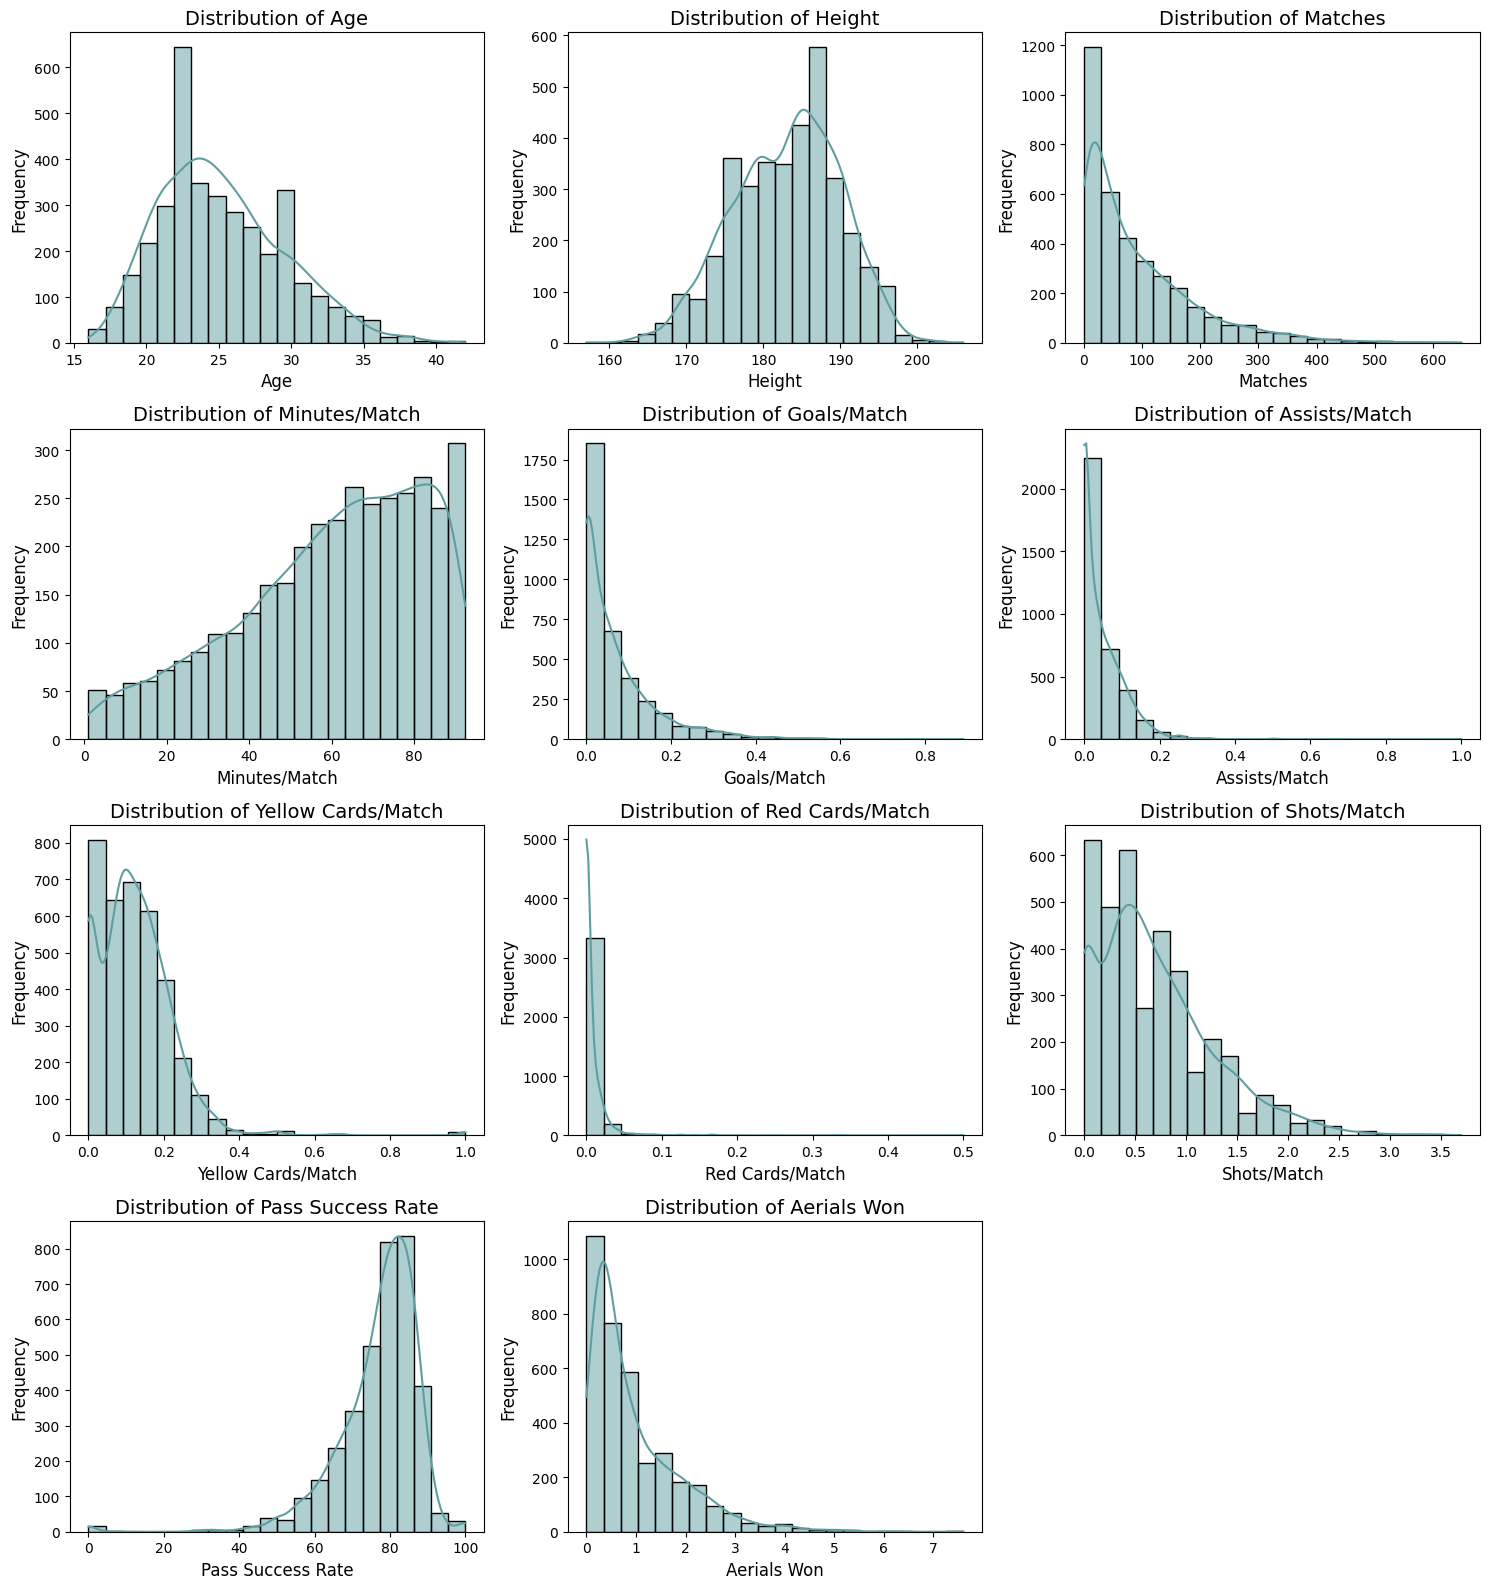

In [14]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Ensure we don't exceed the number of axes
        sns.histplot(df[col], bins=22, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel("Frequency", fontsize=12)
        axes[i].set_title(f"Distribution of {col}", fontsize=14)

# Remove any unused axes
if len(axes) > len(numerical_cols):
    for j in range(len(numerical_cols), len(axes)):
        axes[j].remove()

plt.tight_layout()
plt.show()

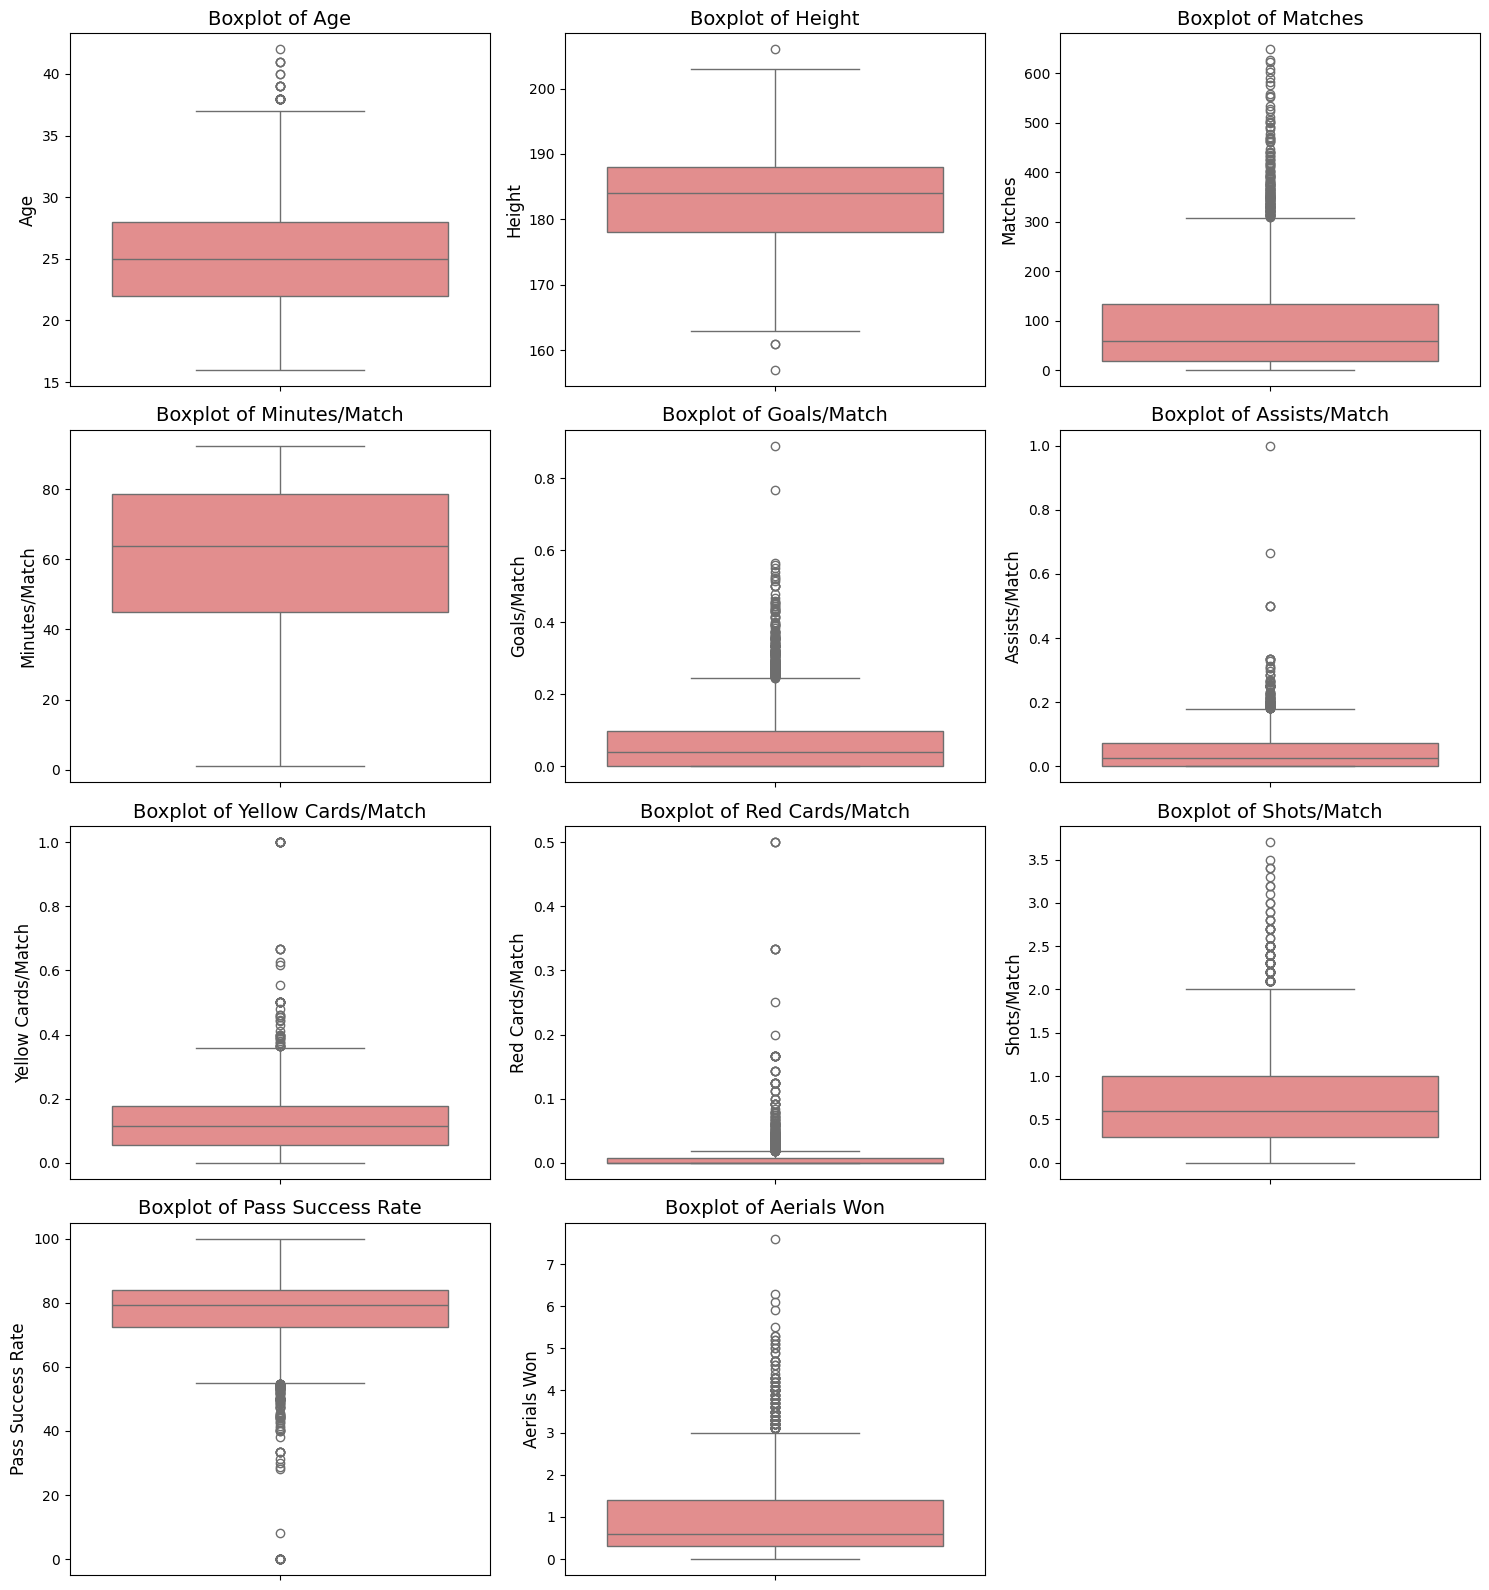

In [15]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

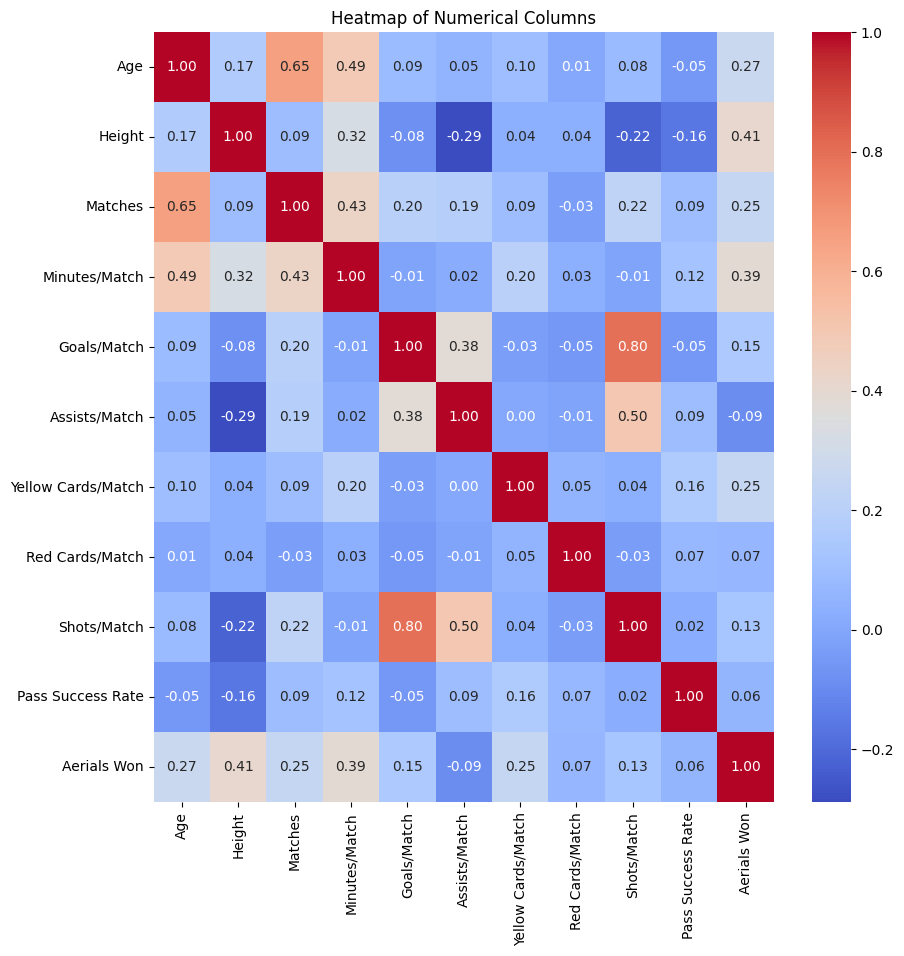

In [17]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [18]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [19]:
X = df.drop(columns=['class'])
y = df['class']

In [20]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Evaluation

In [21]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [23]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.7994467496542186, 0.8049792531120332, 0.8298755186721992, 0.8381742738589212, 0.7621023513139695, 0.8326417704011065, 0.8257261410788381, 0.7524204702627939, 0.7676348547717843]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.79       217
           1       0.81      0.65      0.72       127
           2       0.94      0.94      0.94        78
           3       0.76      0.85      0.80       301

    accuracy                           0.80       723
   macro avg       0.83      0.80      0.81       723
weighted avg       0.80      0.80      0.80       723

Confusion Matrix:
 [[167   6   4  40]
 [  5  82   0  40]
 [  4   1  73   0]
 [ 32  12   1 256]]


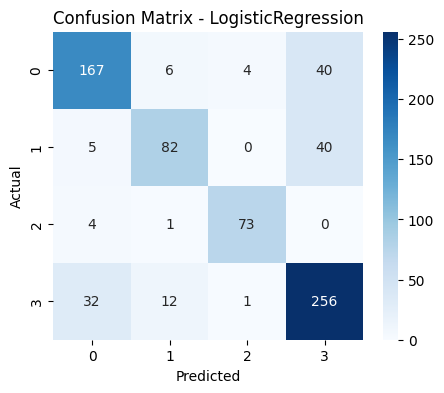

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81       217
           1       0.73      0.59      0.65       127
           2       0.97      0.97      0.97        78
           3       0.76      0.88      0.81       301

    accuracy                           0.80       723
   macro avg       0.83      0.80      0.81       723
weighted avg       0.81      0.80      0.80       723

Confusion Matrix:
 [[165  11   2  39]
 [  5  75   0  47]
 [  1   1  76   0]
 [ 19  16   0 266]]


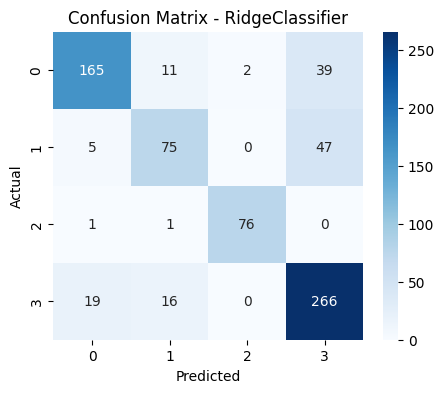

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       217
           1       0.76      0.74      0.75       127
           2       0.97      0.97      0.97        78
           3       0.83      0.82      0.83       301

    accuracy                           0.83       723
   macro avg       0.85      0.84      0.84       723
weighted avg       0.83      0.83      0.83       723

Confusion Matrix:
 [[182  11   2  22]
 [  3  94   0  30]
 [  2   0  76   0]
 [ 34  19   0 248]]


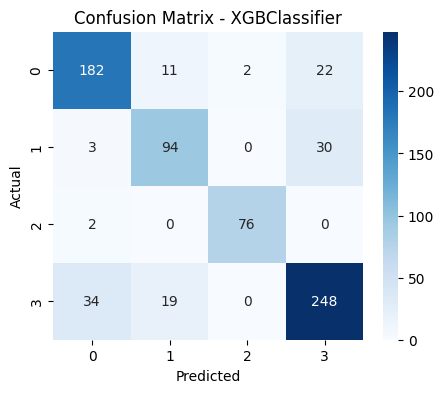

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       217
           1       0.77      0.70      0.74       127
           2       0.99      0.97      0.98        78
           3       0.82      0.85      0.83       301

    accuracy                           0.83       723
   macro avg       0.85      0.84      0.85       723
weighted avg       0.83      0.83      0.83       723

Confusion Matrix:
 [[182  11   1  23]
 [  4  89   0  34]
 [  2   0  76   0]
 [ 31  15   0 255]]


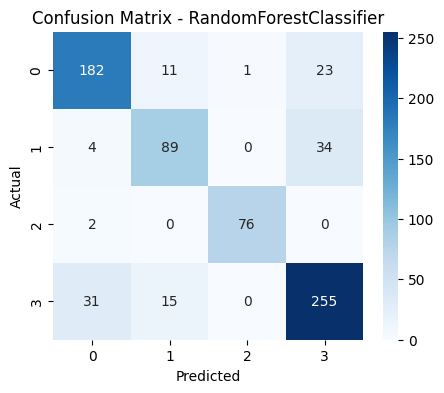

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78       217
           1       0.71      0.53      0.60       127
           2       0.98      0.81      0.89        78
           3       0.72      0.85      0.78       301

    accuracy                           0.76       723
   macro avg       0.80      0.74      0.76       723
weighted avg       0.77      0.76      0.76       723

Confusion Matrix:
 [[166   7   1  43]
 [  5  67   0  55]
 [ 15   0  63   0]
 [ 25  21   0 255]]


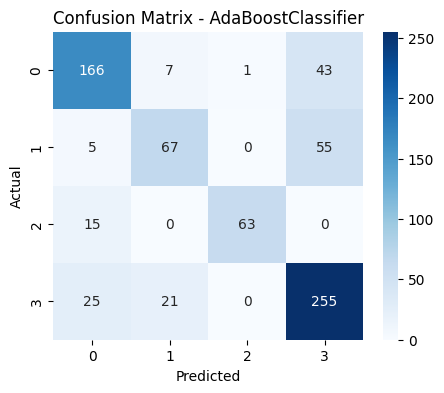

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       217
           1       0.77      0.72      0.74       127
           2       0.99      0.96      0.97        78
           3       0.83      0.84      0.83       301

    accuracy                           0.83       723
   macro avg       0.85      0.84      0.85       723
weighted avg       0.83      0.83      0.83       723

Confusion Matrix:
 [[182  11   1  23]
 [  6  92   0  29]
 [  3   0  75   0]
 [ 31  17   0 253]]


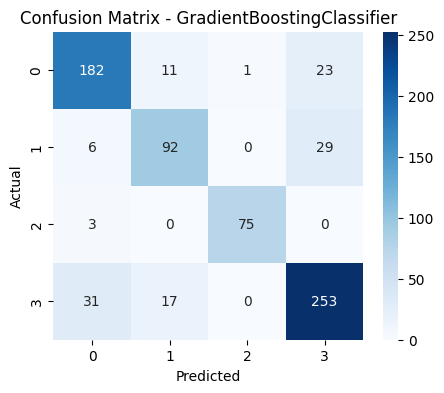

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       217
           1       0.74      0.75      0.74       127
           2       0.99      0.95      0.97        78
           3       0.82      0.78      0.80       301

    accuracy                           0.81       723
   macro avg       0.83      0.83      0.83       723
weighted avg       0.82      0.81      0.81       723

Confusion Matrix:
 [[184   9   1  23]
 [  5  95   0  27]
 [  4   0  74   0]
 [ 41  25   0 235]]


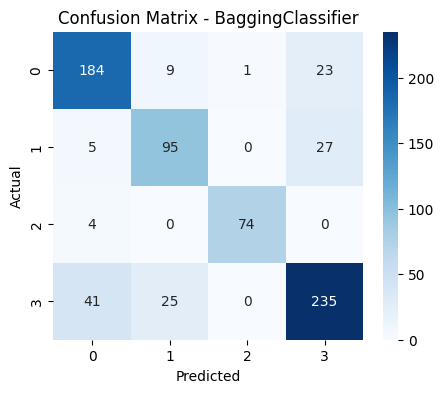

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.74       217
           1       0.66      0.67      0.67       127
           2       0.97      0.95      0.96        78
           3       0.75      0.73      0.74       301

    accuracy                           0.75       723
   macro avg       0.78      0.78      0.78       723
weighted avg       0.75      0.75      0.75       723

Confusion Matrix:
 [[165  12   2  38]
 [  8  85   0  34]
 [  3   0  74   1]
 [ 50  31   0 220]]


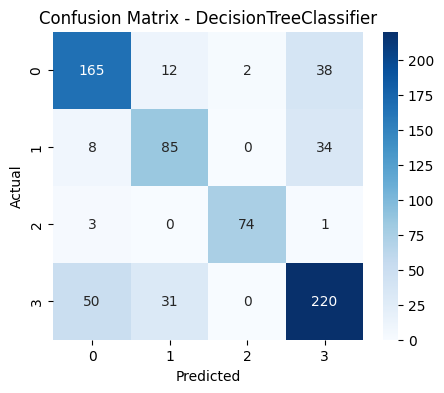

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.66      0.72       217
           1       0.74      0.72      0.73       127
           2       0.90      0.90      0.90        78
           3       0.74      0.83      0.78       301

    accuracy                           0.77       723
   macro avg       0.79      0.78      0.78       723
weighted avg       0.77      0.77      0.77       723

Confusion Matrix:
 [[144  10   7  56]
 [  2  92   0  33]
 [  7   1  70   0]
 [ 30  21   1 249]]


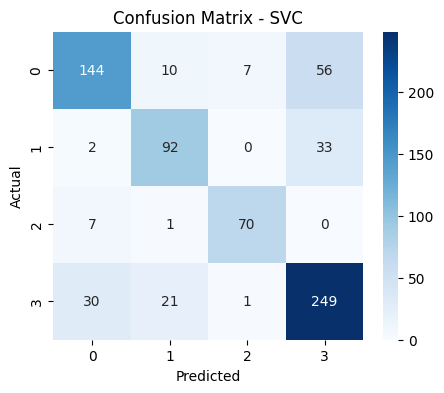

In [24]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()